**Covid-19 Detection using Chest X-ray**

In [1]:
import pandas as pd
import os
import shutil
print(os.listdir(r"D:\CHANDU FILES\COVID\Dataset"))

['Prediction', 'Train', 'Val']


# **LOAD DATASETS**

In [3]:
TRAIN_PATH = "D:/CHANDU FILES/COVID/Dataset/Train"
VAL_PATH = "D:/CHANDU FILES/COVID/Dataset/Val"

In [4]:
train_Covid = "D:/CHANDU FILES/COVID/Dataset/Train/Covid"
train_Normal = "D:/CHANDU FILES/COVID/Dataset/Train/Normal"
Val_Covid = "D:/CHANDU FILES/COVID/Dataset/Val/Covid"
Val_Normal = "D:/CHANDU FILES/COVID/Dataset/Val/Normal"

total_train_Covid = sum([len(files) for _, _, files in os.walk(train_Covid)])
total_train_Normal = sum([len(files) for _, _, files in os.walk(train_Normal)])
total_Val_Covid = sum([len(files) for _, _, files in os.walk(Val_Covid)])
total_Val_Normal = sum([len(files) for _, _, files in os.walk(Val_Normal)])

print("Number of images in training dataset:\n")
print(f"train_Covid dataset: {total_train_Covid}")
print(f"train_Normal dataset: {total_train_Normal}\n")
print("Number of images in Val dataset:\n")
print(f"Val_Covid dataset: {total_Val_Covid}")
print(f"Val_Normal dataset: {total_Val_Normal}")

Number of images in training dataset:

train_Covid dataset: 144
train_Normal dataset: 144

Number of images in Val dataset:

Val_Covid dataset: 30
Val_Normal dataset: 30


# **IMPORTING REQUIRED LIBRARIES**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **BUILDING ARCHITECTURE**

In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses, optimizers

model = Sequential()
# Define the input layer using Input(shape=(224, 224, 3))
model.add(layers.Input(shape=(224, 224, 3)))  # Defining input shape explicitly as the first layer

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.Adam(), metrics=["accuracy"])

# Model summary to check the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,537 (5.56 MB)

 Trainable params: 1,457,537 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

# **TRAIN FROM SCRATCH**

# Data Augmentation


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses, optimizers

# Define the model architecture as earlier
model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.Adam(), metrics=["accuracy"])

# Define ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Set directories for train and validation data (replace these with actual paths)
train_directory =  "D:/CHANDU FILES/COVID/Dataset/Train"
validation_directory =  "D:/CHANDU FILES/COVID/Dataset/Val"

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# Fit The Model

In [13]:
hist = model.fit(
    train_generator,
    steps_per_epoch=min(9, train_generator.samples // train_generator.batch_size),  # Ensure enough data
    epochs=10,
    validation_data=validation_generator,
    validation_steps=max(2, validation_generator.samples // validation_generator.batch_size)  # Ensure at least 2 steps
)

C:\Users\navee\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.4964 - loss: 0.7322 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5891 - loss: 0.6881 - val_accuracy: 0.5167 - val_loss: 0.6751
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6265 - loss: 0.6297 - val_accuracy: 0.5667 - val_loss: 0.5696
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.7290 - loss: 0.6154 - val_accuracy: 0.9000 - val_loss: 0.5029
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7754 - loss: 0.4864 - val_accuracy: 0.9500 - val_loss: 0.3293
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8238 - loss: 0.4349 - val_accuracy: 0.9333 - val_loss: 0.3089
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8321 - loss: 0.4216 - val_accuracy: 0.9333 - val_loss: 0.3191
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8415 - loss: 0.3876 - val_accuracy: 0.9167 - val_loss: 0.2186
Epoch 9/

Loss is very less and accuracy is on point

In [15]:
model.save("Detection_Covid_19.keras") 

# Test Images

In [17]:
from keras.models import load_model

# Load the model
model = load_model("Detection_Covid_19.h5")

# Recompile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Confusion Matrix

In [19]:
y_actual = []
y_test = []

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Ensure y_test and y_actual are defined before using them
y_test = []
y_actual = []

for i in os.listdir("D:/CHANDU FILES/COVID/Dataset/Val/Normal"):
    # Load the image and preprocess it
    img_path = f"D:/CHANDU FILES/COVID/Dataset/Val/Normal/{i}"  # Added "/" before {i}
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image if required by your model

    # Predict using the model
    p = model.predict(img)  # Predict probabilities
    predicted_class = (p[0][0] > 0.5).astype(int)  # Convert probabilities to binary (0/1)

    # Append predictions and actual labels
    y_test.append(predicted_class)
    y_actual.append(1)  # Assuming "Normal" class corresponds to 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Ensure y_test and y_actual are defined before using them
y_test = []
y_actual = []

for i in os.listdir("D:/CHANDU FILES/COVID/Dataset/Val/Covid"):
    # Load the image and preprocess it
    img_path = f"D:/CHANDU FILES/COVID/Dataset/Val/Covid/{i}"  # Fixed the file path
    if not os.path.isfile(img_path):
        print(f"Skipping: {img_path} (file not found)")
        continue

    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image if required by your model

    # Predict using the model
    p = model.predict(img)  # Predict probabilities
    predicted_class = (p[0][0] > 0.5).astype(int)  # Convert probabilities to binary (0/1)

    # Append predictions and actual labels
    y_test.append(predicted_class)
    y_actual.append(0)  # Assuming "Covid" class corresponds to 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━

In [22]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix

# Define the labels explicitly (e.g., for binary classification 0 and 1)
labels = [0, 1]  # Adjust according to your dataset's classes

# Compute the confusion matrix
cm = confusion_matrix(y_actual, y_test, labels=labels)

In [24]:
import seaborn as sns

In [25]:
# sns.heatmap(cm,cmap = "plasma" , annot=True)

# Confusion Matrix

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0]
 [ 0  0]]


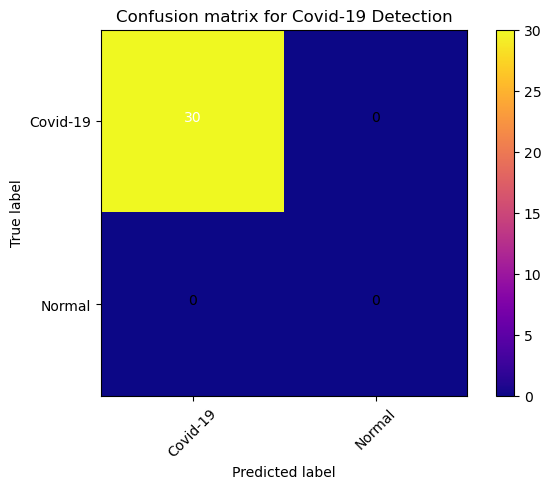

In [28]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

# List All Data In History

In [30]:
history = hist
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Summarize history for accuracy

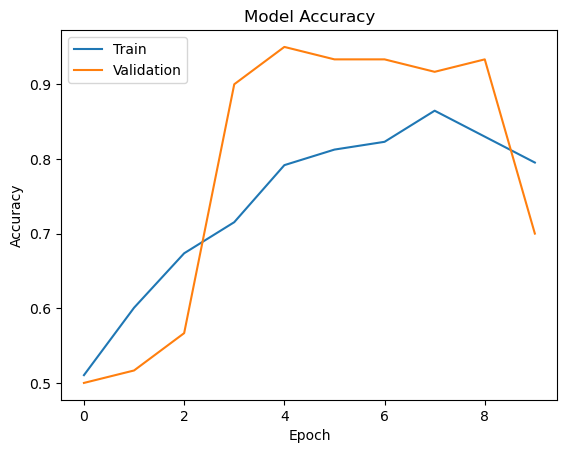

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss

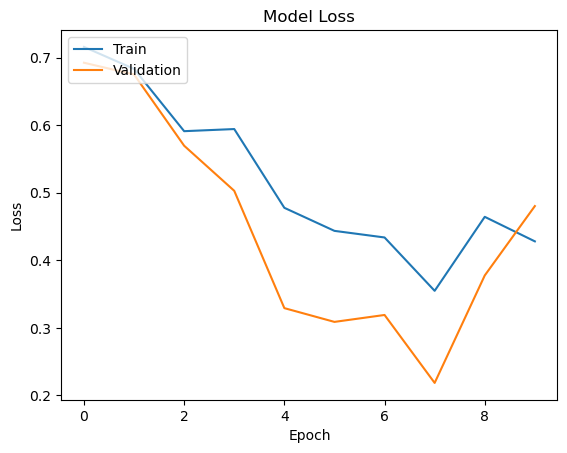

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Predictions from X-Ray Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


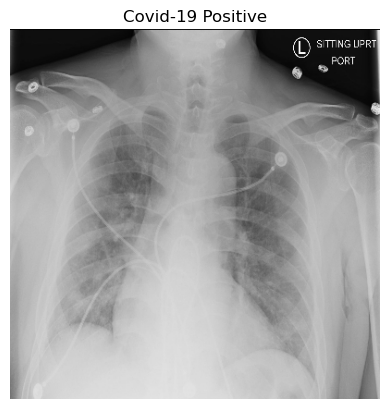

Prediction Of Our Model: Positive For Covid-19


In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

# Load the saved model and compile it
model = load_model("Detection_Covid_19.h5")
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Load and preprocess the image
img_path = "D:/CHANDU FILES/COVID/Dataset/Val/Covid/16654_2_1.jpg"
xtest_image = image.load_img(img_path, target_size=(224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis=0)  # Add batch dimension
xtest_image = xtest_image / 255.0  # Normalize image

# Make predictions
prediction_prob = model.predict(xtest_image)
predicted_class = (prediction_prob[0][0] > 0.5).astype(int)  # Convert to binary (0/1)

# Load and display the image
imggg = cv2.imread(img_path)
imggg = cv2.cvtColor(imggg, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
imggg = cv2.resize(imggg, (400, 400))

plt.imshow(imggg)
plt.axis("off")
plt.title("Covid-19 Positive" if predicted_class == 0 else "Covid-19 Negative")
plt.show()

# Print the prediction result
if predicted_class == 0:
    print("Prediction Of Our Model: Positive For Covid-19")
else:
    print("Prediction Of Our Model: Negative For Covid-19")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


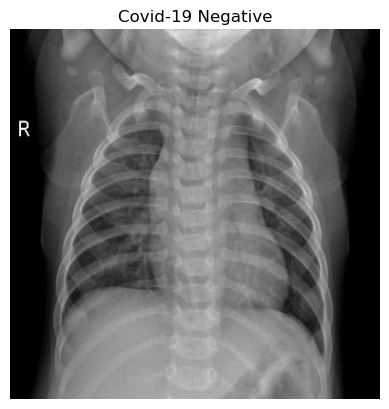

Prediction Of Our Model: Negative For Covid-19


In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

# Load the saved model and compile it
model = load_model("Detection_Covid_19.h5")
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Load and preprocess the image
img_path = "D:/CHANDU FILES/COVID/Dataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg"
xtest_image = image.load_img(img_path, target_size=(224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis=0)  # Add batch dimension
xtest_image = xtest_image / 255.0  # Normalize image

# Make predictions
prediction_prob = model.predict(xtest_image)
predicted_class = (prediction_prob[0][0] > 0.5).astype(int)  # Convert to binary (0/1)

# Load and display the image
imggg = cv2.imread(img_path)
imggg = cv2.cvtColor(imggg, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
imggg = cv2.resize(imggg, (400, 400))

plt.imshow(imggg)
plt.axis("off")
plt.title("Covid-19 Positive" if predicted_class == 0 else "Covid-19 Negative")
plt.show()

# Print the prediction result
if predicted_class == 0:
    print("Prediction Of Our Model: Positive For Covid-19")
else:
    print("Prediction Of Our Model: Negative For Covid-19")